<a href="https://colab.research.google.com/github/AryelPenido/Genetic-Programming/blob/main/TP3Meta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install deap

     |████████████████████████████████| 160 kB 6.8 MB/s 


In [ ]:
#imports
from deap import gp
from deap import tools
from deap import creator
from deap import base
from deap import algorithms
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import deap as dp
from pathlib import Path
import os
import itertools
import operator
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
file_name = next(iter(uploaded))

Saving telecom_users.csv to telecom_users.csv


In [ ]:
df = pd.read_csv("telecom_users.csv",  encoding="ISO-8859-1")
display(df)

,Unnamed: 0,IDCliente,Genero,Aposentado,Casado,Dependentes,MesesComoCliente,ServicoTelefone,MultiplasLinhas,ServicoInternet,ServicoSegurancaOnline,ServicoBackupOnline,ProtecaoEquipamento,ServicoSuporteTecnico,ServicoStreamingTV,ServicoFilmes,TipoContrato,FaturaDigital,FormaPagamento,ValorMensal,TotalGasto,Churn,Codigo
0,1869,7010-BRBUU,Masculino,0,Sim,Sim,72,Sim,Sim,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,2 anos,Nao,CartaoCredito,24.10,1734.65,Nao,NaN
1,4528,9688-YGXVR,Feminino,0,Nao,Nao,44,Sim,Nao,Fibra,Nao,Sim,Sim,Nao,Sim,Nao,Mensal,Sim,CartaoCredito,88.15,3973.2,Nao,NaN
2,6344,9286-DOJGF,Feminino,1,Sim,Nao,38,Sim,Sim,Fibra,Nao,Nao,Nao,Nao,Nao,Nao,Mensal,Sim,DebitoAutomatico,74.95,2869.85,Sim,NaN
3,6739,6994-KERXL,Masculino,0,Nao,Nao,4,Sim,Nao,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Sim,BoletoEletronico,55.90,238.5,Nao,NaN
4,432,2181-UAESM,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,Mensal,Nao,BoletoEletronico,53.45,119.5,Nao,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,3772,0684-AOSIH,Masculino,0,Sim,Nao,1,Sim,Nao,Fibra,Sim,Nao,Nao,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,95.00,95,Sim,NaN
5982,5191,5982-PSMKW,Feminino,0,Sim,Sim,23,Sim,Sim,DSL,Sim,Sim,Sim,Sim,Sim,Sim,2 anos,Sim,CartaoCredito,91.10,2198.3,Nao,NaN
5983,5226,8044-BGWPI,Masculino,0,Sim,Sim,12,Sim,Nao,Nao,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Sim,BoletoEletronico,21.15,306.05,Nao,NaN
5984,5390,7450-NWRTR,Masculino,1,Nao,Nao,12,Sim,Sim,Fibra,Nao,Nao,Sim,Nao,Sim,Sim,Mensal,Sim,BoletoEletronico,99.45,1200.15,Sim,NaN


###Tratando dados


In [ ]:
df.columns

Index(['Unnamed: 0', 'IDCliente', 'Genero', 'Aposentado', 'Casado',
       'Dependentes', 'MesesComoCliente', 'ServicoTelefone', 'MultiplasLinhas',
       'ServicoInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline',
       'ProtecaoEquipamento', 'ServicoSuporteTecnico', 'ServicoStreamingTV',
       'ServicoFilmes', 'TipoContrato', 'FaturaDigital', 'FormaPagamento',
       'ValorMensal', 'TotalGasto', 'Churn', 'Codigo'],
      dtype='object')

In [ ]:
df.drop(columns=["Unnamed: 0",'IDCliente','ServicoTelefone', 'MultiplasLinhas',
       'ServicoInternet', 'ServicoSegurancaOnline', 'ServicoBackupOnline',
       'ProtecaoEquipamento', 'ServicoSuporteTecnico', 'ServicoStreamingTV',
      'ServicoFilmes','Codigo'], inplace=True)

In [ ]:
df = df.dropna(how="all", axis=1) 
df = df.dropna(how="any", axis=0) 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5984 entries, 0 to 5985
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Genero            5984 non-null   object 
 1   Aposentado        5984 non-null   int64  
 2   Casado            5984 non-null   object 
 3   Dependentes       5984 non-null   object 
 4   MesesComoCliente  5984 non-null   int64  
 5   TipoContrato      5984 non-null   object 
 6   FaturaDigital     5984 non-null   object 
 7   FormaPagamento    5984 non-null   object 
 8   ValorMensal       5984 non-null   float64
 9   TotalGasto        5984 non-null   object 
 10  Churn             5984 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 561.0+ KB
None


Mudando tipos dos dados


*   Genero = bool
*   Aposentado = bool
* Dependentes = bool
* Total gasto = float
* Fatura digital = bool
* Meses como cliente = float
* total gasto = float



In [ ]:
df["TotalGasto"] = pd.to_numeric(df["TotalGasto"], errors="coerce")
df['MesesComoCliente'] = df["MesesComoCliente"].astype(float)
df['MesesComoCliente'] = df["MesesComoCliente"].astype(float)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5984 entries, 0 to 5985
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Genero            5984 non-null   object 
 1   Aposentado        5984 non-null   int64  
 2   Casado            5984 non-null   object 
 3   Dependentes       5984 non-null   object 
 4   MesesComoCliente  5984 non-null   float64
 5   TipoContrato      5984 non-null   object 
 6   FaturaDigital     5984 non-null   object 
 7   FormaPagamento    5984 non-null   object 
 8   ValorMensal       5984 non-null   float64
 9   TotalGasto        5974 non-null   float64
 10  Churn             5984 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 561.0+ KB
None


In [ ]:
dfn = pd.get_dummies(df, columns=['Genero', 'Casado', 'Aposentado', 'Dependentes', 
'TipoContrato', 'FaturaDigital', 'FormaPagamento', 'Churn'], drop_first=True, dtype=bool)
print(dfn.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5984 entries, 0 to 5985
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MesesComoCliente                 5984 non-null   float64
 1   ValorMensal                      5984 non-null   float64
 2   TotalGasto                       5974 non-null   float64
 3   Genero_Masculino                 5984 non-null   bool   
 4   Casado_Sim                       5984 non-null   bool   
 5   Aposentado_1                     5984 non-null   bool   
 6   Dependentes_Sim                  5984 non-null   bool   
 7   TipoContrato_Anual               5984 non-null   bool   
 8   TipoContrato_Mensal              5984 non-null   bool   
 9   FaturaDigital_Sim                5984 non-null   bool   
 10  FormaPagamento_BoletoImpresso    5984 non-null   bool   
 11  FormaPagamento_CartaoCredito     5984 non-null   bool   
 12  FormaPagamento_Debit

###Dividindo dataset em test e train


In [ ]:
train, test = train_test_split(dfn.to_numpy().tolist(), random_state=42) 


###Definindo nós internos

In [ ]:

# 3 tipos float 10 tipos bool retorna bool

pset = gp.PrimitiveSetTyped("MAIN", list(itertools.repeat(float, 3)) +list(itertools.repeat(bool, 10)), bool, "IN")

# boolean operators
pset.addPrimitive(operator.and_, [bool, bool], bool)
pset.addPrimitive(operator.or_, [bool, bool], bool)
pset.addPrimitive(operator.not_, [bool], bool)

# floating point operators
# Define a protected division function
def protectedDiv(left, right):
    try: return left / right
    except ZeroDivisionError: return 1

pset.addPrimitive(operator.add, [float,float], float)
pset.addPrimitive(operator.sub, [float,float], float)
pset.addPrimitive(operator.mul, [float,float], float)
pset.addPrimitive(protectedDiv, [float,float], float)

# logic operators
# Define a new if-then-else function
def if_then_else(input, output1, output2):
    if input: return output1
    else: return output2

pset.addPrimitive(operator.lt, [float, float], bool)
pset.addPrimitive(operator.eq, [float, float], bool)
pset.addPrimitive(if_then_else, [bool, float, float], float)

# terminals
#pset.addEphemeralConstant("rand100", lambda: random.random() * 100, float)
pset.addTerminal(False, bool)




###Criando individuo e função fitness

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)


###Construindo o toolbox

In [ ]:
def evaluate_individual(individual):
    func = toolbox.compile(expr=individual)
    customers_sample = random.sample(train, 400)
    result = sum(bool(func(*customer[:13])) is bool(customer[13]) for customer in customers_sample)

    return result,



In [ ]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=5, max_=5)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

NameError: ignored

In [ ]:
toolbox.register("evaluate", evaluate_individual)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)


##Main


In [ ]:
dfn.columns

Index(['MesesComoCliente', 'ValorMensal', 'TotalGasto', 'Genero_Masculino',
       'Casado_Sim', 'Aposentado_1', 'Dependentes_Sim', 'TipoContrato_Anual',
       'TipoContrato_Mensal', 'FaturaDigital_Sim',
       'FormaPagamento_BoletoImpresso', 'FormaPagamento_CartaoCredito',
       'FormaPagamento_DebitoAutomatico', 'Churn_Sim'],
      dtype='object')

In [ ]:

def Config1():
    #random.seed(10)
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    
    algorithms.eaSimple(pop, toolbox, 0.5, 0.2, 40, stats, halloffame=hof, verbose=None)

    return hof


In [ ]:
bestTrain = []
bestExpressionTrain = []
def Train(n):
    for i in range(n):
      hof = Config1()[0]
      func = toolbox.compile(expr=hof)
      result_train = sum(bool(func(*customer[:13])) is bool(customer[13]) for customer in train) / len(train)
      bestTrain.append(result_train)
      bestExpressionTrain.append(hof)
#Train(30)

bestTest = []
bestExpressionTest = []
def Test(n):
  for i in range(n):
      hof = Config1()[0]
      func = toolbox.compile(expr=hof)
      result_test = sum(bool(func(*customer[:13])) is bool(customer[13]) for customer in test) / len(test)
      bestTest.append(result_test)
      bestExpressionTest.append(hof)
  
#Test(30)

minimo:  0.7551247771836007
maximo:  0.7569073083778967
média:  0.7554590017825312
desvio padrão:  0.0006527924773933218
o maior valor encontrado nas 30 iterações foi 0.7569073083778967
a melhor expressão encontrada:  lt(protectedDiv(add(mul(protectedDiv(IN2, IN1), if_then_else(IN12, IN0, IN0)), mul(add(IN2, IN1), add(IN2, IN0))), add(mul(add(IN1, IN1), IN2), mul(mul(IN0, IN0), add(IN0, IN2)))), add(sub(protectedDiv(if_then_else(eq(IN1, IN2), IN1, IN2), add(IN1, IN0)), sub(mul(IN0, IN2), mul(IN0, IN1))), if_then_else(and_(eq(IN2, IN0), and_(IN11, IN11)), mul(sub(IN1, IN2), protectedDiv(IN1, IN1)), mul(if_then_else(IN7, IN1, IN2), protectedDiv(IN1, IN0)))))


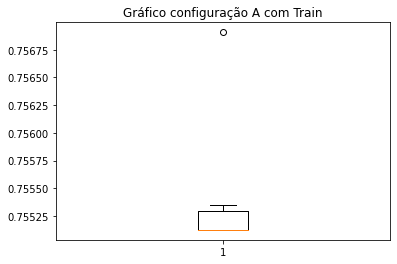

In [ ]:
Train(30)
indexMax = np.argmax(bestTrain)

print("minimo: ", np.min(bestTrain))
print("maximo: ", np.max(bestTrain))
print("média: ",np.mean(bestTrain))
print("desvio padrão: ", np.std(bestTrain))
print(f'o maior valor encontrado nas 30 iterações foi {bestTrain[indexMax]}')
print('a melhor expressão encontrada: ', bestExpressionTrain[indexMax])


plt.clf()
plt.boxplot(bestTrain)
plt.title("Gráfico configuração A com Train")

plt.savefig("Gráfico ATrain", format='png')

minimo:  0.7446524064171123
maximo:  0.7847593582887701
média:  0.7609848484848485
desvio padrão:  0.008718387450660425
o maior valor encontrado nas 30 iterações foi 0.7847593582887701
a melhor expressão encontrada:  lt(add(mul(protectedDiv(sub(IN0, IN2), if_then_else(IN10, IN1, IN0)), mul(IN1, if_then_else(IN6, IN1, IN1))), if_then_else(eq(protectedDiv(IN1, IN1), add(IN2, IN2)), add(if_then_else(IN12, IN2, IN2), protectedDiv(IN0, add(IN2, IN2))), add(mul(IN1, sub(IN2, IN0)), protectedDiv(IN2, IN0)))), add(mul(mul(if_then_else(IN6, IN1, IN1), if_then_else(IN3, IN0, IN0)), sub(add(IN1, IN0), add(IN1, IN2))), add(if_then_else(or_(IN7, IN3), add(IN1, IN0), protectedDiv(IN2, IN0)), if_then_else(eq(IN1, IN2), IN2, if_then_else(IN12, IN2, IN1)))))


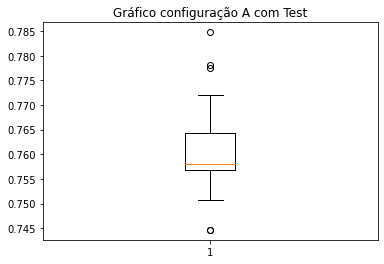

In [ ]:
Test(30)
indexMax = np.argmax(bestTest)

print("minimo: ", np.min(bestTest))
print("maximo: ", np.max(bestTest))
print("média: ",np.mean(bestTest))
print("desvio padrão: ", np.std(bestTest))
print(f'o maior valor encontrado nas 30 iterações foi {bestTest[indexMax]}')
print('a melhor expressão encontrada: ', bestExpressionTest[indexMax])


plt.clf()
plt.boxplot(bestTest)
plt.title("Gráfico configuração A com Test")

plt.savefig("Gráfico ATest", format='png')

In [ ]:

def Config2():
    #random.seed(10)
    MU, LAMBDA = 50, 100
    pop = toolbox.population(n=MU)
    hof = tools.ParetoFront()
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    algorithms.eaMuPlusLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, cxpb=0.5, mutpb=0.2, ngen=150, 
                              stats=stats, halloffame=hof, verbose=None)
    
    return hof


###gerando gráfico configuração B

In [ ]:
bestTrainB = []
bestExpressionTrainB = []
def Train(n):
    for i in range(n):
      hof = Config2()[0]
      func = toolbox.compile(expr=hof)
      result_train = sum(bool(func(*customer[:13])) is bool(customer[13]) for customer in train) / len(train)
      bestTrainB.append(result_train)
      bestExpressionTrainB.append(hof)
#Train(30)

bestTestB = []
bestExpressionTestB = []
def Test(n):
  for i in range(n):
      hof = Config2()[0]
      func = toolbox.compile(expr=hof)
      result_test = sum(bool(func(*customer[:13])) is bool(customer[13]) for customer in test) / len(test)
      bestTestB.append(result_test)
      bestExpressionTestB.append(hof)
  
#Test(30)

minimo:  0.73150623885918
maximo:  0.7702762923351159
média:  0.748165478312537
desvio padrão:  0.013320207531033558
o maior valor encontrado nas 30 iterações foi 0.7702762923351159
a melhor expressão encontrada:  lt(mul(if_then_else(eq(sub(IN0, IN1), protectedDiv(IN1, IN0)), mul(if_then_else(False, IN1, IN1), sub(IN2, IN2)), protectedDiv(mul(IN0, IN0), sub(IN2, IN0))), protectedDiv(add(protectedDiv(IN1, IN2), mul(IN2, IN2)), sub(sub(IN2, IN1), sub(IN0, IN1)))), if_then_else(or_(and_(and_(IN3, IN9), and_(IN8, IN6)), IN9), sub(protectedDiv(mul(IN1, IN1), IN1), protectedDiv(if_then_else(IN6, mul(add(IN1, IN1), protectedDiv(IN2, IN2)), IN2), sub(sub(IN2, IN2), IN0))), add(add(add(IN1, IN0), sub(IN0, IN2)), protectedDiv(IN2, if_then_else(IN5, IN0, IN1)))))


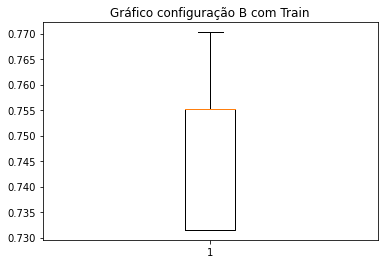

In [ ]:
Train(30)
indexMax = np.argmax(bestTrainB)

print("minimo: ", np.min(bestTrainB))
print("maximo: ", np.max(bestTrainB))
print("média: ",np.mean(bestTrainB))
print("desvio padrão: ", np.std(bestTrainB))
print(f'o maior valor encontrado nas 30 iterações foi {bestTrainB[indexMax]}')
print('a melhor expressão encontrada: ', bestExpressionTrainB[indexMax])


plt.clf()
plt.boxplot(bestTrainB)
plt.title("Gráfico configuração B com Train")

plt.savefig("Gráfico B", format='png')

In [ ]:
Test(2)
indexMax = np.argmax(bestTestB)

print("minimo: ", np.min(bestTestB))
print("maximo: ", np.max(bestTestB))
print("média: ",np.mean(bestTestB))
print("desvio padrão: ", np.std(bestTestB))
print(f'o maior valor encontrado nas 30 iterações foi {bestTestB[indexMax]}')
print('a melhor expressão encontrada: ', bestExpressionTestB[indexMax])


plt.clf()
plt.boxplot(bestTestB)
plt.title("Gráfico configuração B com Test")

plt.savefig("Gráfico B", format='png')

###Melhores resultados